In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [249]:
data = pd.read_csv('Sentiment_Results.csv')

In [250]:
# During the article gathering, there were a bunch of articles that were of other companies besides TSLA
#this will get information specifally about TSLA
#data = data.drop(['Unnamed: 0'], axis=1)
data = data[(data.Company_Symbol == 'TSLA')]
data['Date_Published']= pd.to_datetime(data['Date_Published']) 
data.head()

,Unnamed: 0,URL,Title,Company_Symbol,Author,Date_Published,Time_Published,Overall_SA,Positive_SA,Negative_SA,Neutral_SA
0,0,https://www.ibtimes.com/tesla-news-company-emp...,Tesla News: Company Emphasizes How Powerwall C...,TSLA,Wesley Dockery,2019-08-10,10:56 AM,0.8555,0.047,0.006,0.947
1,1,https://www.ibtimes.com/life-tesla-spacex-elon...,Life Before Tesla And SpaceX? Elon Musk’s Mom ...,TSLA,Dawn Geske,2019-08-09,3:22 PM,-0.6369,0.042,0.063,0.895
3,3,https://www.ibtimes.com/tesla-pickup-design-wh...,Tesla Pickup Design: Which Of These Concepts I...,TSLA,Lorraine Lorenzo,2019-08-08,11:35 PM,0.9455,0.071,0.038,0.890
4,4,https://www.ibtimes.com/new-tesla-dead-tesla-m...,New Tesla For The Dead? Tesla Model S Hearse F...,TSLA,Arthur Villasanta,2019-08-08,7:17 AM,0.5499,0.064,0.059,0.877
5,5,https://www.ibtimes.com/tesla-model-3-not-safe...,Tesla Model 3 Is Not The Safest Car Ever Teste...,TSLA,Arthur Villasanta,2019-08-08,12:25 AM,0.7047,0.084,0.069,0.847


In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 0 to 767
Data columns (total 11 columns):
Unnamed: 0        576 non-null int64
URL               576 non-null object
Title             576 non-null object
Company_Symbol    576 non-null object
Author            576 non-null object
Date_Published    576 non-null datetime64[ns]
Time_Published    576 non-null object
Overall_SA        576 non-null float64
Positive_SA       576 non-null float64
Negative_SA       576 non-null float64
Neutral_SA        576 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 54.0+ KB


In [252]:
data.describe()

,Unnamed: 0,Overall_SA,Positive_SA,Negative_SA,Neutral_SA
count,576.000000,576.000000,576.000000,576.000000,576.000000
mean,352.425347,0.557297,0.078800,0.041918,0.879281
std,218.405705,0.682639,0.033274,0.031952,0.044812
min,0.000000,-0.993600,0.004000,0.000000,0.690000
25%,160.750000,0.517675,0.055000,0.017000,0.850000
50%,336.500000,0.939800,0.075000,0.034000,0.881000
75%,528.250000,0.979300,0.098000,0.059250,0.912000
max,767.000000,0.998600,0.233000,0.156000,0.987000


Based on the information above, out of 576 articles, the average sentiment rating was 0.557 from a scale of -1 to 1 which indicates the majority of the articles are positive

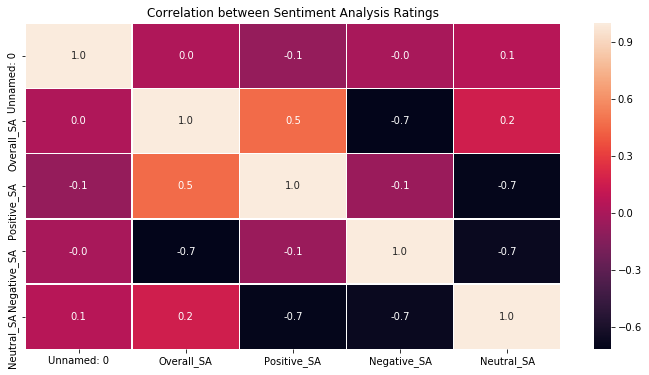

In [253]:
f,ax = plt.subplots(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlation between Sentiment Analysis Ratings')
plt.show()

In [254]:
overall_ratings = data.Overall_SA
overall_ratings = list(overall_ratings.apply(lambda x: round(x, 1)))
sorted_ratings = Counter(overall_ratings)
sorted_ratings = sorted(sorted_ratings.items())

x = []
y = []
for key, value in sorted_ratings:
    x.append(key)
    y.append(value)

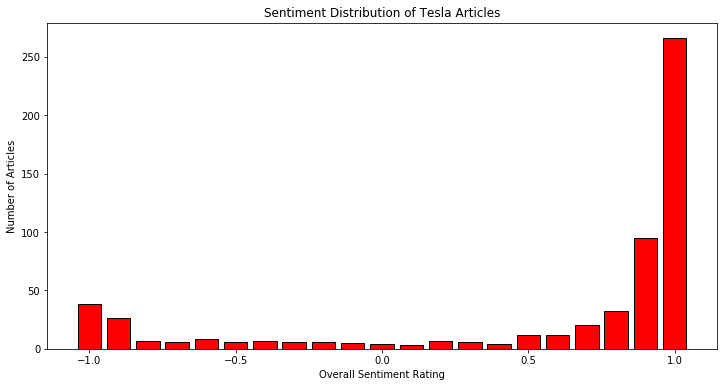

In [255]:
plt.figure(figsize=(12, 6))
plt.bar(x, y, width=0.08, color = 'red', edgecolor='black')
plt.title('Sentiment Distribution of Tesla Articles')
plt.xlabel('Overall Sentiment Rating')
plt.ylabel('Number of Articles')
plt.show()

Looking at the graph, the company has generally had very positive news. The graph distribution is slightly bimodal with a strong negative skew meaning that the mean and standard deviation is much closer to the right side of the graph.

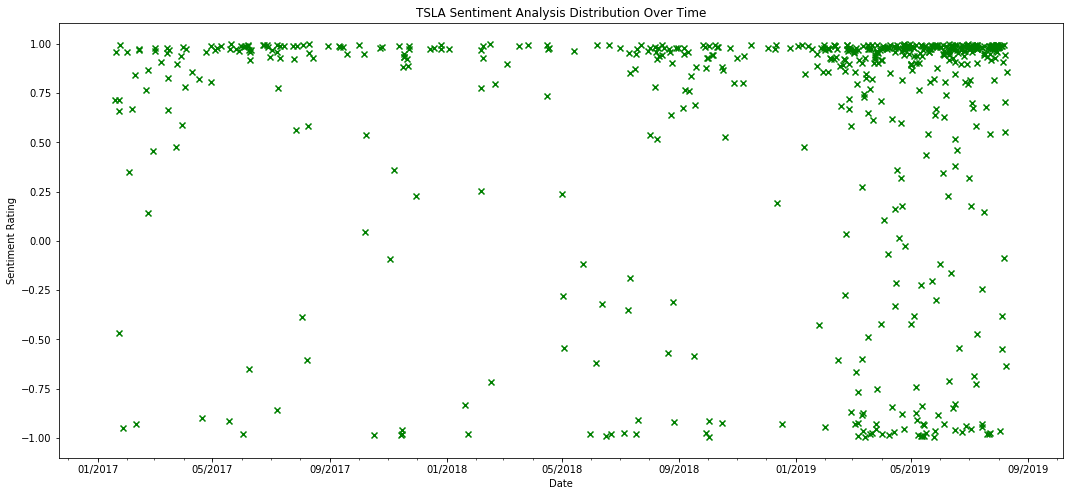

In [264]:
myFmt = mdates.DateFormatter('%m/%Y')
months = mdates.MonthLocator()

plt.figure(figsize=(18, 8))
plt.scatter(x=data.Date_Published, y=data.Overall_SA, marker='x', color='green')
plt.title('TSLA Sentiment Analysis Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Rating')
ax = plt.subplot()
ax.xaxis.set_major_formatter(myFmt) 
ax.xaxis.set_minor_locator(months)
plt.show()